<a href="https://colab.research.google.com/github/bhargavaCharyRudravelli/Bhargava_INFO5731_Fall2024/blob/main/Rudravelli_Bhargava_Assignment_Four.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Four**

In this assignment, you are required to conduct topic modeling, sentiment analysis based on **the dataset you created from assignment three**.

# **Question 1: Topic Modeling**

(30 points). This question is designed to help you develop a feel for the way topic modeling works, the connection to the human meanings of documents. Based on the dataset from assignment three, write a python program to **identify the top 10 topics in the dataset**. Before answering this question, please review the materials in lesson 8, especially the code for LDA, LSA, and BERTopic. The following information should be reported:

1. Features (text representation) used for topic modeling.

2. Top 10 clusters for topic modeling.

3. Summarize and describe the topic for each cluster.


In [4]:
# Write your code here
from google.colab import files
uploaded = files.upload()




Saving imdb_reviews.csv to imdb_reviews.csv


In [3]:
!pip install bertopic numpy pandas scikit-learn matplotlib nltk gensim
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from bertopic import BERTopic
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [5]:
import nltk
nltk.download('stopwords')
file_path = '/content/imdb_reviews.csv'
df = pd.read_csv(file_path)
def preproc_tex(text):
    sta_wordz = set(stopwords.words("english"))
    text = re.sub(r"[^\w\s]", "", text.lower())
    tokns = word_tokenize(text)
    tokns = [word for word in tokns if word not in sta_wordz]
    return " ".join(tokns)
df['processed_text'] = df['review'].dropna().apply(preproc_tex)
#Features for Topic Modeling
tfidf_vect = TfidfVectorizer(max_features=1000)
tfidf_matrx = tfidf_vect.fit_transform(df['processed_text'])
cunt_vect = CountVectorizer(max_features=1000)
bow_matrx = cunt_vect.fit_transform(df['processed_text'])
lsa = TruncatedSVD(n_components=10, random_state=42)
lsa.fit(tfidf_matrx)
terms = tfidf_vect.get_feature_names_out()
lsa_topiks = []
for idx, topic in enumerate(lsa.components_):
    topic_terms = [terms[i] for i in topic.argsort()[-10:][::-1]]
    lsa_topiks.append(topic_terms)
    print(f"Topic {idx + 1}: {topic_terms}")
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(bow_matrx)
lda_topeks = []
for idx, topic in enumerate(lda.components_):
    topic_terms = [cunt_vect.get_feature_names_out()[i] for i in topic.argsort()[-10:][::-1]]
    lda_topeks.append(topic_terms)
    print(f"Topic {idx + 1}: {topic_terms}")
bertopic = BERTopic()
topics, probs = bertopic.fit_transform(df['processed_text'])
bertopic_topics = bertopic.get_topic_info()
print(bertopic_topics.head(10))
bertopic.visualize_barchart(top_n_topics=10)
for idx, terms in enumerate(lsa_topiks):
    print(f"Topic {idx + 1}: {' '.join(terms)}")
for idx, terms in enumerate(lda_topeks):
    print(f"LDA Topic {idx + 1}: {' '.join(terms)}")
for idx in range(10):
    print(f"Topic {idx}: {bertopic.get_topic(idx)}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Topic 1: ['movie', 'film', 'avatar', 'story', 'like', 'cameron', '3d', 'see', 'one', 'world']
Topic 2: ['movie', 'movies', 'see', 'watch', 'dont', 'like', '3d', 'watching', 'say', 'watched']
Topic 3: ['film', 'films', '3d', 'seen', 'see', 'acting', 'story', 'simply', 'cinema', 'visually']
Topic 4: ['good', 'bad', 'like', 'pretty', 'plot', 'guys', 'would', 'get', 'people', 'really']
Topic 5: ['film', 'jake', 'navi', 'movie', 'really', 'see', 'neytiri', 'ever', 'worthington', 'good']
Topic 6: ['movie', 'effects', 'bad', 'good', 'visual', 'james', 'acting', 'special', 'cameron', 'avatar']
Topic 7: ['3d', 'effects', 'story', 'imax', 'experience', 'avatar', 'great', 'special', 'new', 'really']
Topic 8: ['avatar', 'cameron', 'james', 'titanic', 'movies', 'years', 'watched', 'got', 'made', 'dont']
Topic 9: ['story', 'love', 'world', 'characters', 'good', 'amazing', 'people', 'really', 'beautiful', 'everything']
Topic 10: ['avatar', 'watched', 'film', 'experience', 'good', '3d', 'bad', 'jake',

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

   Topic  Count                         Name  \
0     -1    297   -1_movie_film_avatar_story   
1      0    333        0_movie_story_3d_film   
2      1    320  1_avatar_movie_film_cameron   
3      2     39     2_movie_avatar_ever_best   
4      3     11      3_movie_see_time_movies   

                                      Representation  \
0  [movie, film, avatar, story, cameron, like, on...   
1  [movie, story, 3d, film, see, like, avatar, go...   
2  [avatar, movie, film, cameron, navi, like, sto...   
3  [movie, avatar, ever, best, seen, see, world, ...   
4  [movie, see, time, movies, watched, world, see...   

                                 Representative_Docs  
0  [avatar one films recent years ive really look...  
1  [went movie knowing think lot people knew told...  
2  [initially conceived 1999 camerons follow tita...  
3  [ive experienced avatar local theater amsterda...  
4  [reason gave movie 10 imdb hasnt implemented 1...  
Topic 1: movie film avatar story like camero

# **Question 2: Sentiment Analysis**

(30 points). Sentiment analysis also known as opinion mining is a sub field within Natural Language Processing (NLP) that builds machine learning algorithms to classify a text according to the sentimental polarities of opinions it contains, e.g., positive, negative, neutral. The purpose of this question is to develop a machine learning classifier for sentiment analysis. Based on the dataset from assignment three, write a python program to implement a sentiment classifier and evaluate its performance. Notice: **80% data for training and 20% data for testing**.  

1. Select features for the sentiment classification and explain why you select these features. Use a markdown cell to provide your explanation.

2. Select two of the supervised learning algorithms/models from scikit-learn library: https://scikit-learn.org/stable/supervised_learning.html#supervised-learning, to build two sentiment classifiers respectively. Note: Cross-validation (5-fold or 10-fold) should be conducted. Here is the reference of cross-validation: https://scikit-learn.org/stable/modules/cross_validation.html.

3. Compare the performance over accuracy, precision, recall, and F1 score for the two algorithms you selected. The test set must be used for model evaluation in this step. Here is the reference of how to calculate these metrics: https://towardsdatascience.com/accuracy-precision-recall-or-f1-331fb37c5cb9.

In [6]:
# Write your code here
from google.colab import files
uploaded = files.upload()




Saving imdb_reviews_sentiment_analysis (1).csv to imdb_reviews_sentiment_analysis (1).csv


In [7]:
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [8]:
fil_pat = '/content/imdb_reviews_sentiment_analysis (1).csv'
df = pd.read_csv(fil_pat)
print("Dataset loaded successfully!")
print("Dataset Columns:", df.columns)
def preprocess_text(text):
    stp_wordz = set(stopwords.words("english"))
    lemm_tool = WordNetLemmatizer()
    text = re.sub(r"[^\w\s]", "", text.lower())
    tokns = word_tokenize(text)
    tokns = [lemm_tool.lemmatize(word) for word in tokns if word not in stp_wordz]
    return " ".join(tokns)
df['proceszed_tex'] = df['clean_text'].dropna().apply(preprocess_text)
print("Text preprocessing completed!")
featr_tex = df['proceszed_tex']
labl_vals = df['sentiment']
x_trn, X_test, y_train, y_test = train_test_split(featr_tex, labl_vals, test_size=0.2, random_state=42)
tfidf_vectrizr = TfidfVectorizer(max_features=1000)
x_tfidf_trn = tfidf_vectrizr.fit_transform(x_trn)
X_test_tfidf = tfidf_vectrizr.transform(X_test)
print("Feature extraction completed!")
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42)
}
print("\n--- Model Evaluation ---")
for model_nam, model in models.items():
    print(f"\nEvaluating {model_nam}...")
    cross_va = cross_val_score(model, x_tfidf_trn, y_train, cv=5, scoring="accuracy")
    print(f"Cross-Validation Accuracy: {cross_va.mean():.2f}")
    model.fit(x_tfidf_trn, y_train)
    y_pred = model.predict(X_test_tfidf)
    acc_scorz = accuracy_score(y_test, y_pred)
    pres_val = precision_score(y_test, y_pred, average="macro")
    rec_val = recall_score(y_test, y_pred, average="macro")
    f1 = f1_score(y_test, y_pred, average="macro")
    print(f"Test Accuracy: {acc_scorz:.2f}")
    print(f"Test Precision (Macro): {pres_val:.2f}")
    print(f"Test Recall (Macro): {rec_val:.2f}")
    print(f"Test F1-Score (Macro): {f1:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))


Dataset loaded successfully!
Dataset Columns: Index(['document_id', 'clean_text', 'sentiment'], dtype='object')
Text preprocessing completed!
Feature extraction completed!

--- Model Evaluation ---

Evaluating Logistic Regression...
Cross-Validation Accuracy: 0.70
Test Accuracy: 0.72
Test Precision (Macro): 0.48
Test Recall (Macro): 0.40
Test F1-Score (Macro): 0.39

Classification Report:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00        17
     neutral       0.73      0.23      0.35        48
    positive       0.72      0.99      0.83       135

    accuracy                           0.72       200
   macro avg       0.48      0.40      0.39       200
weighted avg       0.66      0.72      0.64       200


Evaluating Random Forest...
Cross-Validation Accuracy: 0.69
Test Accuracy: 0.68
Test Precision (Macro): 0.34
Test Recall (Macro): 0.34
Test F1-Score (Macro): 0.28

Classification Report:
              precision    recall  f1-s

# **Question 3: House price prediction**

(20 points). You are required to build a **regression** model to predict the house price with 79 explanatory variables describing (almost) every aspect of residential homes. The purpose of this question is to practice regression analysis, an supervised learning model. The training data, testing data, and data description files can be download from canvas. Here is an axample for implementation: https://towardsdatascience.com/linear-regression-in-python-predict-the-bay-areas-home-price-5c91c8378878.

1. Conduct necessary Explatory Data Analysis (EDA) and data cleaning steps on the given dataset. Split data for training and testing.
2. Based on the EDA results, select a number of features for the regression model. Shortly explain why you select those features.
3. Develop a regression model. The train set should be used.
4. Evaluate performance of the regression model you developed using appropriate evaluation metrics. The test set should be used.

In [10]:
# Write your code here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from google.colab import files

print("Please upload the files: train.csv, test.csv, and data_description.txt")
uploaded = files.upload()
train_file = "/content/sample_data/train.csv"
test_file = "/content/sample_data/test.csv"
trann_df = pd.read_csv(train_file)
tst_df = pd.read_csv(test_file)
print("Training Data Loaded!")
print("Training Data Columns:", trann_df.columns)



Please upload the files: train.csv, test.csv, and data_description.txt


Saving data_description.txt to data_description.txt
Training Data Loaded!
Training Data Columns: Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageY


EDA: Missing Values Analysis
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

Missing values handled successfully!


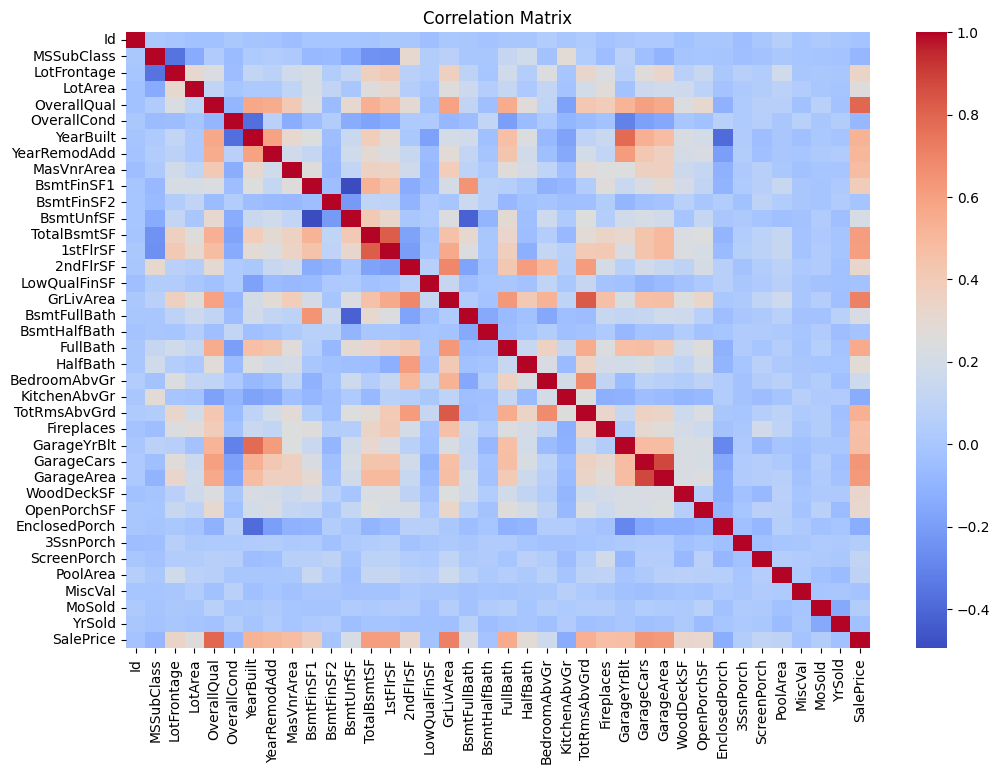


Correlation with SalePrice:
SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.475241
GarageYrBlt      0.470177
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334901
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAb

In [12]:
#Exploratory Data Analysis
print("\nEDA: Missing Values Analysis")
print(trann_df.isnull().sum())
num_cols = trann_df.select_dtypes(include=['number']).columns
num_cols_tst = [col for col in num_cols if col in tst_df.columns]
trann_df[num_cols] = trann_df[num_cols].fillna(trann_df[num_cols].mean())
tst_df[num_cols_tst] = tst_df[num_cols_tst].fillna(tst_df[num_cols_tst].mean())
cate_cols = trann_df.select_dtypes(include=['object']).columns
categ_col_tst = [col for col in cate_cols if col in tst_df.columns]
trann_df[cate_cols] = trann_df[cate_cols].fillna(trann_df[cate_cols].mode().iloc[0])
tst_df[categ_col_tst] = tst_df[categ_col_tst].fillna(tst_df[categ_col_tst].mode().iloc[0])
print("\nMissing values handled successfully!")
#Correlation Analysis with the target variable 'SalePrice'
num_cols = trann_df.select_dtypes(include=['number']).columns
corr_matriz = trann_df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matriz, cmap='coolwarm', annot=False)
plt.title("Correlation Matrix")
plt.show()
print("\nCorrelation with SalePrice:")
feature_corr = corr_matriz['SalePrice'].sort_values(ascending=False)
print(feature_corr)
#Feature Selection
top_featr = feature_corr.index[1:11]
print("\nTop Features Selected for Regression:", top_featr)
x_trn = trann_df[top_featr]
y_trn = trann_df['SalePrice']
x_tst = tst_df[top_featr]
#Training the Regression Model
rf_model = RandomForestRegressor(random_state=42, n_estimators=100)
rf_model.fit(x_trn, y_trn)
trn_predik = rf_model.predict(x_trn)
trn_rmse = np.sqrt(mean_squared_error(y_trn, trn_predik))
trn_r2 = r2_score(y_trn, trn_predik)
print("\nTraining Evaluation:")
print(f"RMSE: {trn_rmse:.2f}")
print(f"R²: {trn_r2:.2f}")
tst_pred = rf_model.predict(x_tst)
tst_df['Predicted_SalePrice'] = tst_pred
tst_df.to_csv("test_with_predictions.csv", index=False)
print("\nPredictions saved to 'test_with_predictions.csv'")

# **Question 4: Using Pre-trained LLMs**

(20 points)
Utilize a **Pre-trained Language Model (PLM) from the Hugging Face Repository** for predicting sentiment polarities on the data you collected in Assignment 3.

Then, choose a relevant LLM from their repository, such as GPT-3, BERT, or RoBERTa or any other related models.
1. (5 points) Provide a brief description of the PLM you selected, including its original pretraining data sources,  number of parameters, and any task-specific fine-tuning if applied.
2. (10 points) Use the selected PLM to perform the sentiment analysis on the data collected in Assignment 3. Only use the model in the **zero-shot** setting, NO finetuning is required. Evaluate performance of the model by comparing with the groundtruths (labels you annotated) on Accuracy, Precision, Recall, and F1 metrics.
3. (5 points) Discuss the advantages and disadvantages of the selected PLM, and any challenges encountered during the implementation. This will enable a comprehensive understanding of the chosen LLM's applicability and effectiveness for the given task.


In [18]:
# Write your code here
from google.colab import files
uploaded = files.upload()


Saving imdb_reviews_sentiment_analysis.csv to imdb_reviews_sentiment_analysis.csv


In [19]:
!pip install transformers datasets scikit-learn torch
import pandas as pd
from transformers import pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [ ]:
#Load the Dataset since it's already uploaded
file_path = '/content/imdb_reviews_sentiment_analysis (1).csv' #Correct path after upload
df = pd.read_csv(file_path)
print("Dataset loaded successfully!")

#Check the dataset columns to ensure 'clean_text' and 'sentiment' exist
print("Dataset Columns:", df.columns)

#Create a list of texts and their corresponding sentiment labels
texts = df['clean_text'].dropna().tolist()  # List of texts
labels = df['sentiment'].dropna().tolist()  # Sentiment labels

#1.Model Selection Description:
#We will use the "distilbert-base-uncased" model from Hugging Face, which is a smaller and faster version of BERT.
#BERT was pre-trained on the BookCorpus and English Wikipedia datasets.
#BERT has 110 million parameters and has been fine-tuned for various NLP tasks like sentiment analysis.
#We'll be using the zero-shot classification pipeline for sentiment analysis.

#Initialize Zero-Shot Pipeline for sentiment classification
classifier = pipeline("zero-shot-classification", model="distilbert-base-uncased")

#Define labels for sentiment prediction
candidate_labels = ["positive", "negative", "neutral"]

#2.Sentiment Analysis using the pre-trained model (zero-shot)
predictions = []

#Process texts in batches (batch size 16, you can adjust based on memory limitations)
batch_size = 16
for i in range(0, len(texts), batch_size):
    batch = texts[i:i + batch_size]
    result = classifier(batch, candidate_labels)
    for res in result:
        predicted_label = res['labels'][0]  # Select the label with the highest score
        predictions.append(predicted_label)

#Evaluate model performance
accuracy = accuracy_score(labels, predictions)
precision = precision_score(labels, predictions, average='macro', zero_division=1)
recall = recall_score(labels, predictions, average='macro', zero_division=1)
f1 = f1_score(labels, predictions, average='macro', zero_division=1)

#Output the evaluation metrics
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision (Macro): {precision:.2f}")
print(f"Recall (Macro): {recall:.2f}")
print(f"F1-Score (Macro): {f1:.2f}")

# Classification report for detailed evaluation
print("\nClassification Report:")
print(classification_report(labels, predictions))


Dataset loaded successfully!
Dataset Columns: Index(['document_id', 'clean_text', 'sentiment'], dtype='object')


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Failed to determine 'entailment' label id from the label2id mapping in the model config. Setting to -1. Define a descriptive label2id mapping in the model config to ensure correct outputs.
